<center> <H1>Stage C Assessment - Winter '23 </H1> </center>

<center> <H4> by </H4> </center>

<center> <H3> Yusuf Okunlola </H3> </center>

### Stability of the Grid System

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

## Machine Learning Task

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#  import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
     
# import classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load dataset
df = pd.read_csv("dataset/Data_for_UCI_named.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
# inspect dataframe by printing out the first 5 rows
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(10000, 14)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
# Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' will be dropped
df.drop(columns=['stab'], inplace=True)
print(df.shape)

(10000, 13)


In [7]:
# variable ratio 'stabf' feature
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
# descriptive statistics of the dataset
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [9]:
# find categorical variable and encode
cat_features = df.select_dtypes(include=['object', 'category']).columns
num_features = [col for col in df.columns if col not in cat_features]

# print categorical variable
cat_features

Index(['stabf'], dtype='object')

In [10]:
# print numerical variable
num_features

['tau1',
 'tau2',
 'tau3',
 'tau4',
 'p1',
 'p2',
 'p3',
 'p4',
 'g1',
 'g2',
 'g3',
 'g4']

In [11]:
# label encoding
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [12]:
# print dataframe head to check if encoding has been effected
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


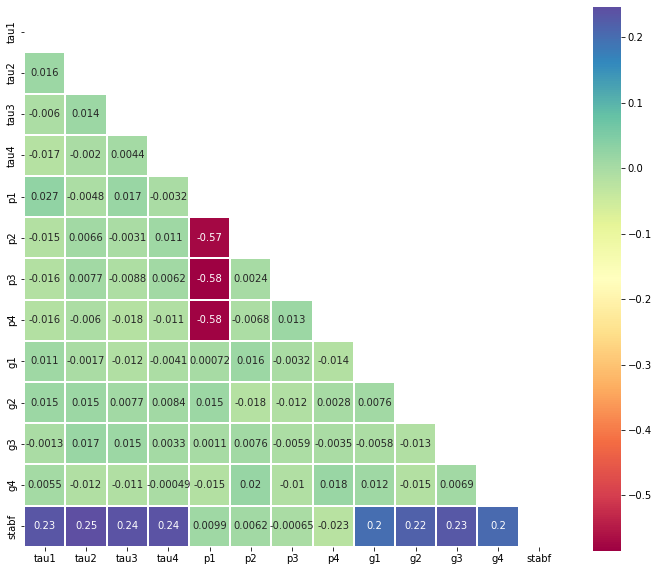

In [13]:
# visualize the correlation coefficient of the features
plt.figure(figsize=(12,10))
corrMatrix = df.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True,linewidths=.3, mask=mask, cmap='Spectral', square=True)
plt.show()

In [14]:
# split data into feature matrix 'X' and target vector 'y'
target = "stabf"
X = df.drop(columns=target)
y = df[target]

In [15]:
# split data into training and test sets with a 80:20 ratio and a random state of 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 12)
y_train shape: (8000,)
X_test shape: (2000, 12)
y_test shape: (2000,)


In [16]:
#  assert data split to avoid leakage
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [17]:
# standardize data
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)

# Modeling 

In [18]:
# What is the accuracy on the test set using the random forest classifier? In 4 decimal places.
# What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.
# What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [19]:
# instantiate the models
modelclasses = {'RandomForest': RandomForestClassifier(),
                'XGB': XGBClassifier(),
                'LightGBM': LGBMClassifier(),
                'ExtraTree': ExtraTreesClassifier()
                }

In [20]:
# create a list to store model results
cla_scores = []

for model_name, model_method in modelclasses.items():
    
    # fit model to training data
    model_method.fit(scalled_x_train, y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(scalled_x_test)
    
    # evaluation metric for the model: accuracy score
    score = accuracy_score(y_test, y_pred)
    
    # append the results to the list
    cla_scores.append(score)
    
# store result in dataframe
cla_results = pd.DataFrame({"Model":modelclasses.keys(), "Score": cla_scores})

# sort the results in descending order
cla_results.sort_values(by = 'Score', ascending = False)

,Model,Score
1,XGB,0.9455
2,LightGBM,0.9395
3,ExtraTree,0.9285
0,RandomForest,0.9170


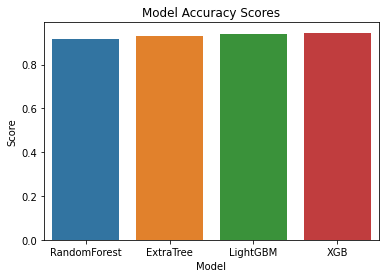

In [21]:
# Build bar chart, label axes, add title and show plot
sns.barplot(x='Model', y='Score', data=cla_results, order=cla_results.sort_values('Score').Model)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Accuracy Scores")
plt.show()

In [22]:
# Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. 
# What are the best hyperparameters from the randomized search CV?

In [23]:
model = ExtraTreesClassifier()

randm_src = RandomizedSearchCV(estimator=model, 
                               param_distributions={
                                    'n_estimators': range(50,1000,50),
                                    'max_features': range(50,301,50),
                                    'min_samples_leaf': range(1,20,2),
                                    'min_samples_split': range(1,20,2),
                                }, 
                               cv=5, 
                               n_iter=10, 
                               scoring = 'accuracy', 
                               n_jobs = -1, 
                               verbose = 1, 
                               random_state = 1)


randm_src.fit(scalled_x_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 ExtraTreesClassifier(max_features=50, min_samples_leaf=3, min_samples_split=5,
                     n_estimators=400)

 The best score across ALL searched params:
 0.928625

 The best parameters across ALL searched params:
 {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 50}


In [25]:
# Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). 
# Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?
# Answer: Higher

In [24]:
# instantiate model
model = ExtraTreesClassifier(n_estimators = 400 , min_samples_split = 5 , min_samples_leaf = 3, max_features = 50, random_state=1)

# fit model
model.fit(scalled_x_train, y_train)

# make predictions based on accuracy score
accuracy = accuracy_score(y_test, model.predict(scalled_x_test))

# print accuracy score
print(accuracy)

0.9345


In [27]:
# Find the feature importance using the optimal ExtraTreesClassifier model. 
# Which features are the most and least important respectively?
# Answer: tau2, p1

In [26]:
feat_imp = model.feature_importances_
feat_imp_ = pd.DataFrame(feat_imp, X.columns, columns=["Feature Importance"]).sort_values("Feature Importance")
feat_imp_

,Feature Importance
p1,0.011157
p4,0.013198
p2,0.013405
p3,0.013781
g1,0.102204
g2,0.106374
g4,0.108891
g3,0.110656
tau3,0.127881
tau4,0.128745
